In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import os
import cv2
import joblib
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

/home/jafar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [57]:
DATADIR="."
# CATEGORIES=["Aaaa", "interflw","pahoehoe","transi"]
CATEGORIES=["Aaaa", "interflw","pahoehoe"]
#CATEGORIES=["Aaa_enta","Aaa_lava ball","inter_brown","inter_red","pa_domed vesicle","pa_gas cavity","pa_inflection1","pa_inflection2","pa_joints","pa_pipes","pa_pipes and vesicles","pa_ropes","pa_squeezeup","pa_sq up","pa_toes","pa_vesicle banding","pa_vesicle cyl","tr_ftb 800","tr_rubbly","tr_slabby"]

numclass=len(CATEGORIES)

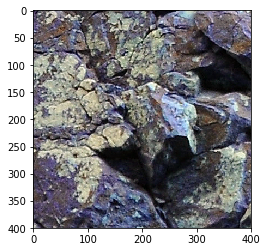

In [58]:
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

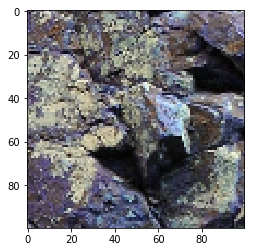

In [59]:
IMG_SIZE=100
new=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new)
plt.show()

In [60]:
#img_array


In [61]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            #print(np.shape(img_array) ,class_num)
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])

create_training_data()


for i in training_data:
    #print(i)
    height, width = i.shape[:2]
    break

In [62]:
import random
random.shuffle(training_data)
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y=np.array(y)

Int64Index([2, 0, 1], dtype='int64')


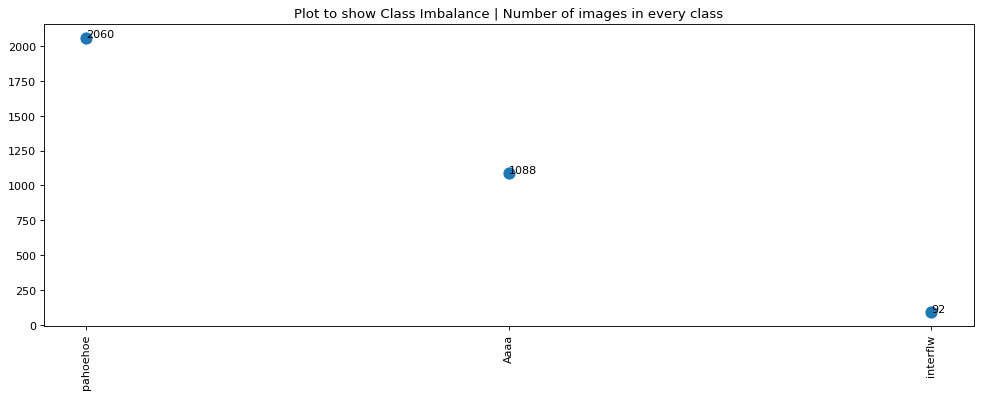

In [63]:
# PLotting Class imbalance in the data


Y=pd.Series(y)

class_counts=Y.value_counts()
print(class_counts.index)
cats=pd.Series(CATEGORIES).iloc[class_counts.index]

fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

#plt.hist(y,bins=numclass, color='#0504aa',alpha=0.7, rwidth=0.85)

plt.scatter(cats,class_counts,s=100)
for i,j in zip(cats,class_counts):
    ax.annotate(str(j),xy=(i,j))

plt.xticks(rotation=90)
plt.title("Plot to show Class Imbalance | Number of images in every class")
plt.show()

#pickle_out=open("X.pickle","wb")
#pickle.dump,(y,pickle_out)
#pickle_out.close()

In [9]:
joblib.dump(X,'X.pickle_400_3Class')
joblib.dump(y,'y.pickle_400_3Class')


['y.pickle_400_3Class']

In [2]:
X=joblib.load('X.pickle_400_3Class')
y=joblib.load('y.pickle_400_3Class')

In [42]:
X=np.divide(X,255)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)


In [44]:
# def rock_classifier():
model=Sequential()

model.add(Conv2D(20,(2,2),input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100))

model.add(Dense(numclass))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)
# return model
#rock_classifier()

Train on 2170 samples, validate on 1070 samples
Epoch 1/30
2170/2170 [==============================] - 19s 9ms/step - loss: 0.7788 - acc: 0.6387 - val_loss: 0.7168 - val_acc: 0.6355
Epoch 2/30
2170/2170 [==============================] - 20s 9ms/step - loss: 0.5535 - acc: 0.7751 - val_loss: 0.4466 - val_acc: 0.8327
Epoch 3/30
2170/2170 [==============================] - 22s 10ms/step - loss: 0.3846 - acc: 0.8530 - val_loss: 0.3327 - val_acc: 0.8710
Epoch 4/30
2170/2170 [==============================] - 21s 10ms/step - loss: 0.3126 - acc: 0.8783 - val_loss: 0.2888 - val_acc: 0.8869
Epoch 5/30
2170/2170 [==============================] - 20s 9ms/step - loss: 0.2726 - acc: 0.8885 - val_loss: 0.2654 - val_acc: 0.8935
Epoch 6/30
2170/2170 [==============================] - 21s 10ms/step - loss: 0.2835 - acc: 0.8806 - val_loss: 0.2688 - val_acc: 0.8916
Epoch 7/30
2170/2170 [==============================] - 24s 11ms/step - loss: 0.2043 - acc: 0.9101 - val_loss: 0.2007 - val_acc: 0.9028
Epo

In [12]:
score=model.evaluate(X_test,y_test,verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.06396527933696651
Test accuracy 0.9831775697592263


In [45]:
y_pred_prob=model.predict(X_test)


In [46]:
y_pred=np.argmax(y_pred_prob,axis=1)

### Create Confusion Matrix

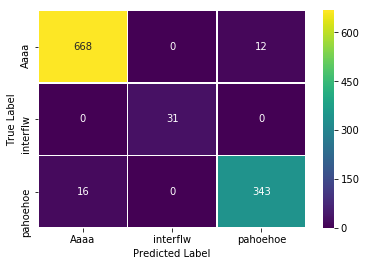

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
acc=accuracy_score(y_test,y_pred)
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat
sns.heatmap(conf_mat,annot=True,cmap='viridis',fmt="d",linewidths=.5,yticklabels=CATEGORIES,xticklabels=CATEGORIES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Precision Recall

In [68]:
from sklearn.metrics import classification_report, precision_recall_curve

print(classification_report(y_test,y_pred))
precision, recall,thresholds=precision_recall_curve(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       680
           1       1.00      1.00      1.00        31
           2       0.97      0.96      0.96       359

   micro avg       0.97      0.97      0.97      1070
   macro avg       0.98      0.98      0.98      1070
weighted avg       0.97      0.97      0.97      1070



ValueError: multiclass format is not supported

### CV accuracy

In [25]:
model.predict(X_test[:4])

array([[1.6044215e-03, 2.8633422e-09, 9.9837226e-01, 2.3304154e-05],
       [2.6501066e-06, 3.6572467e-18, 9.9999738e-01, 2.2381673e-08],
       [1.3076728e-05, 3.9643633e-13, 1.4983664e-07, 9.9998677e-01],
       [9.9997818e-01, 2.0767787e-13, 2.1810711e-05, 6.3165626e-11]],
      dtype=float32)

In [17]:
y_test[:4]

array([2, 2, 3, 0])

In [12]:
# kfold = KFold(n_splits=5, shuffle=True)

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
   
    y_train, y_test = y[train_index], y[test_index]
  


In [29]:
estimator = KerasClassifier(build_fn=rock_classifier, epochs=30, batch_size=1,verbose=1)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
# kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, y, cv=skfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 1/30
2948/2948 [==============================] - 32s 11ms/step - loss: 0.8049 - acc: 0.6808
Epoch 2/30
2948/2948 [==============================] - 34s 12ms/step - loss: 0.5736 - acc: 0.7687
Epoch 3/30
2948/2948 [==============================] - 34s 11ms/step - loss: 0.5021 - acc: 0.7921
Epoch 4/30
2948/2948 [==============================] - 34s 11ms/step - loss: 0.4441 - acc: 0.8060
Epoch 5/30
2948/2948 [==============================] - 34s 11ms/step - loss: 0.4010 - acc: 0.8301
Epoch 6/30
2948/2948 [==============================] - 34s 11ms/step - loss: 0.3747 - acc: 0.8382
Epoch 7/30
2948/2948 [==============================] - 34s 11ms/step - loss: 0.3387 - acc: 0.8491
Epoch 8/30
2948/2948 [==============================] - 34s 12ms/step - loss: 0.3081 - acc: 0.8660
Epoch 9/30
2948/2948 [==============================] - 34s 11ms/step - loss: 0.2973 - acc: 0.8769
Epoch 10/30
2948/2948 [==============================] - 34s 12ms/step - loss: 0.2742 - acc: 0.8847
Epoch 11/

2950/2950 [==============================] - 34s 11ms/step - loss: 0.1792 - acc: 0.9339
Epoch 23/30
2950/2950 [==============================] - 34s 11ms/step - loss: 0.2004 - acc: 0.9342
Epoch 24/30
2950/2950 [==============================] - 34s 11ms/step - loss: 0.2232 - acc: 0.9217
Epoch 25/30
2950/2950 [==============================] - 34s 11ms/step - loss: 0.1933 - acc: 0.9336
Epoch 26/30
2950/2950 [==============================] - 34s 11ms/step - loss: 0.1740 - acc: 0.9390
Epoch 27/30
2950/2950 [==============================] - 34s 11ms/step - loss: 0.1773 - acc: 0.9346
Epoch 28/30
2950/2950 [==============================] - 34s 11ms/step - loss: 0.1762 - acc: 0.9366
Epoch 29/30
2950/2950 [==============================] - 34s 11ms/step - loss: 0.1740 - acc: 0.9447
Epoch 30/30
737/737 [==============================] - 3s 4ms/step
Epoch 1/30
2951/2951 [==============================] - 35s 12ms/step - loss: 0.7976 - acc: 0.6906
Epoch 2/30
2951/2951 [========================

In [30]:
filename='results_400_4_class_150.sav'
joblib.dump(results, filename)
results


array([0.93098782, 0.90121786, 0.91723202, 0.92391304, 0.88451087])